In [1]:
import matplotlib.pyplot as plt
import numpy as np

# LAB 10 - The Discrete Fourier Transform (DFT)

## DUE:  3 April 2023 @ 11.59pm

## NAME: Ethan Deal$\hspace{2.5in}$                                 STUDENT NUMBER: 10878509

The purpose of this lab is to give you practice with the discrete Fourier Transform (DFT).  Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help out the TA with the grading process.**

## Q1: Exploring the DFT

This question examines how you approach subsampling of a signal, and what are the consequences of not following the recommended approach.

**Q1-1:** **Visualizing the Fourier Matrix**: The Fourier Matrix used by the DFT is given by 

$$[W_N^{kn}] = [e^{-i2\pi kn/N}], \quad {\rm where}\quad k,n=0,N-1$$

Plot the real and imaginary components of $W_N^{kn}$ for N=4, 16, 64 and 256 points.

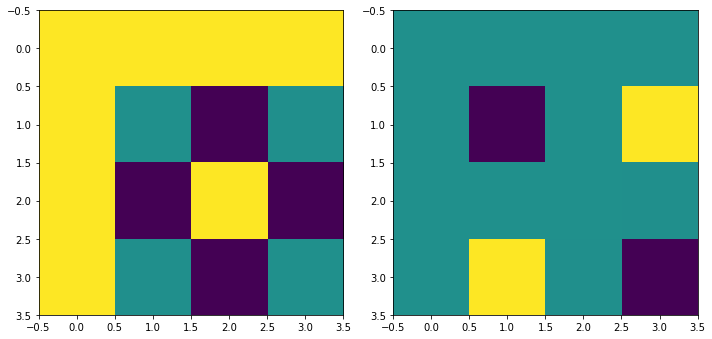

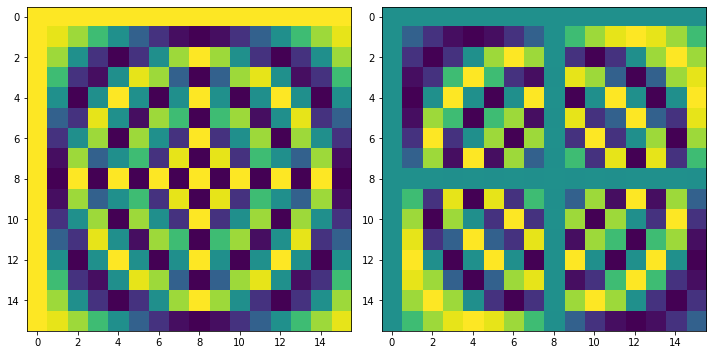

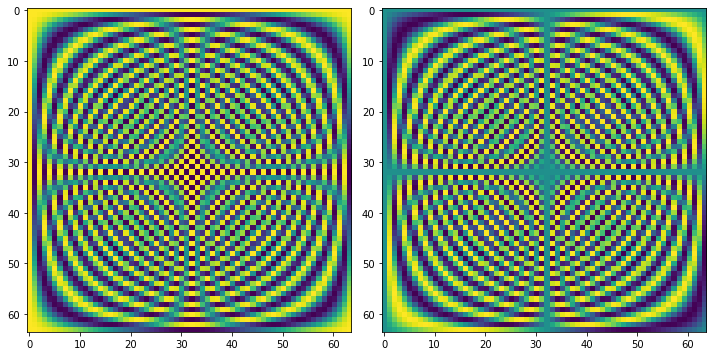

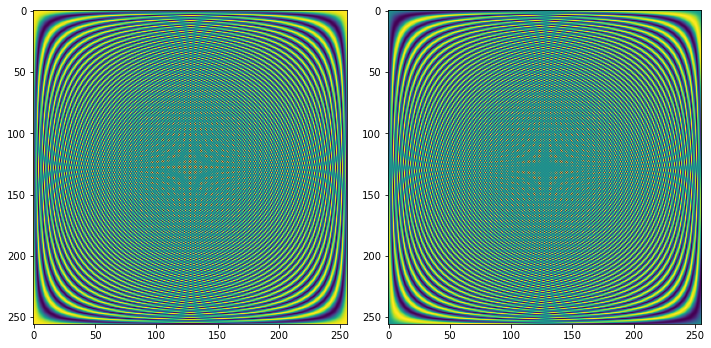

In [2]:
Ns = [4,16,64,256]

for N in Ns:
    s = np.zeros((N,N),dtype=complex)
    for k in range(N):
        for n in range(N):
            e = complex((1j *-2.0*np.pi*k*n) / N)
            s[k][n] = np.exp(e)

    plt.figure(figsize=(10,10))
    
    plt.subplot(1,2,1)
    plt.imshow(np.real(s))
    
    plt.subplot(1,2,2)
    plt.imshow(np.imag(s))
    
    plt.tight_layout()
    plt.show()

In [3]:
def ft(N):
    s = np.zeros((N,N),dtype=complex)
    for k in range(N):
        for n in range(N):
            e = complex((1j *-2.0*np.pi*k*n) / N)
            s[k][n] = np.exp(e)
    return s

**Q1-2:** Find the **analytic** 16-point DFT of the following sequence:

$$x[n] = \delta[n]+\delta[n-4]$$

Illustrate your answer with a numerical example **without using the np.fft.fft() function**. (Hint: Think matrix multiplication using one of your results from **Q1-1**.)

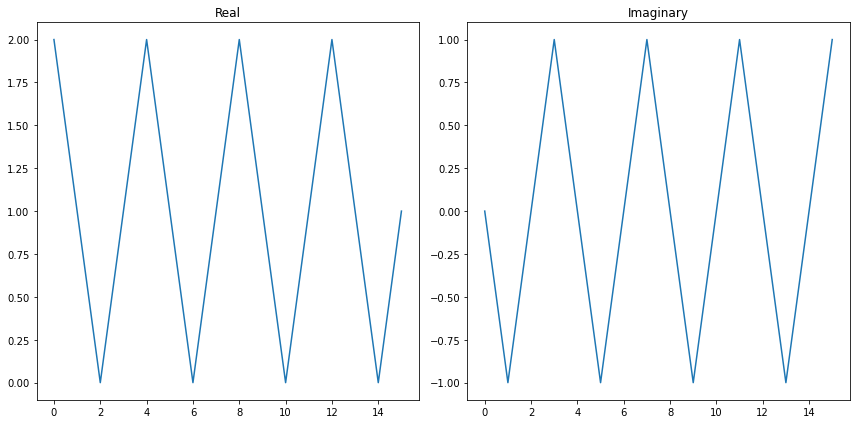

In [4]:
s16 = ft(16)

x = np.zeros(16)
x[0] = 1
x[4] = 1

X = x @ s16

X2 = np.fft.fft(x)

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.plot(np.real(X))
plt.title('Real')
plt.subplot(1,2,2)
plt.plot(np.imag(X))
plt.title('Imaginary')

plt.tight_layout()
plt.show()

**Q1-3:** Find the analytic 8-point DFT of the following sequence:

$$x[n] = \mathrm{cos}\left(\frac{\pi n}{4}\right) \mathrm{sin}\left(\frac{3\pi n}{4}\right)$$

Illustrate your answer with a numerical example **without using the np.fft.fft() function**.

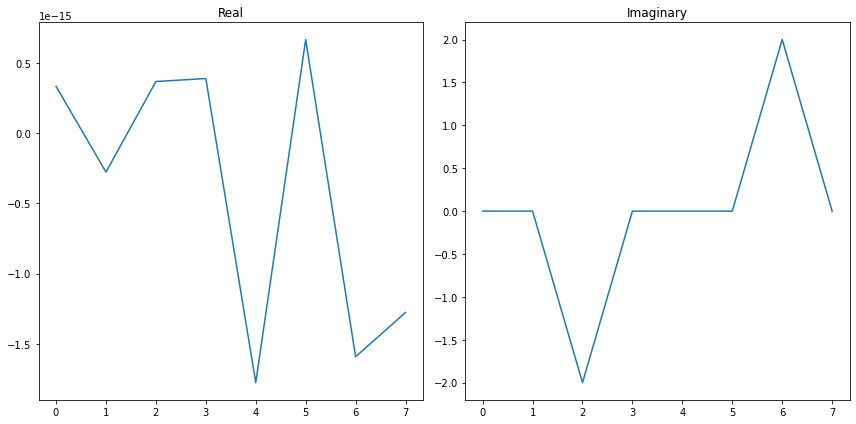

In [5]:
s8 = ft(8)
             
nn = np.arange(0,8,1)
xn = np.cos(np.pi*nn/4) * np.sin(3*np.pi*nn/4)

Xw = xn@s8

Xw2 = np.fft.fft(xn)

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.plot(np.real(Xw))
plt.title('Real')
plt.subplot(1,2,2)
plt.plot(np.imag(Xw))
plt.title('Imaginary')

plt.tight_layout()
plt.show()

**Q1-4** Find the 10-point **inverse** DFT of the following sequence :

$$X[k] = 
\left\{
\begin{array}{cc}
1, & k=0\\
-1, & else\\
\end{array}
\right.
$$

Illustrate your answer with a numerical example **without using the np.fft.fft() function**. (Hint: think linearity and how you can define two useful function from the one below!)

In [6]:
def ift(N):
    s = np.zeros((N,N),dtype=complex)
    for k in range(N):
        for n in range(N):
            e = complex((1j *2.0*np.pi*k*n) / N)
            s[k][n] = np.exp(e)
    return s

C:\Users\ejdea\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


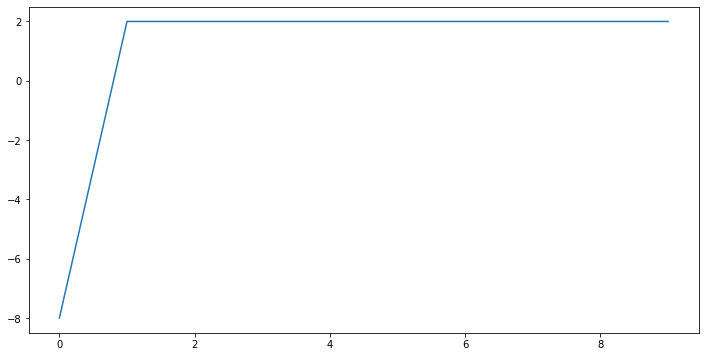

In [7]:
s10 = ift(10)

Xk = np.ones(10)
Xk = Xk * -1
Xk[0] = 1

xk = Xk @ s10


plt.figure(figsize = (12,6))

plt.plot(xk)

## Q2: Evaluating 1st Derivative FD Operator Accuracy


### Background

One of the most commonly used approaches for calculating the numerical derivative of a discrete time series is to use the [finite-difference method](https://en.wikipedia.org/wiki/Finite_difference_method) (or FD).  We commonly refer to the "N-th order of accuracy" of the FD approximation as $\mathcal{O}\left(\Delta h^N\right)$.  This is commonly represented by a Taylor-series approximation of a function $f(x_0+\Delta h)$ some $\Delta h$ away from $x_0$:  

$$f(x_0 + \Delta h) = f(x_0) + \frac{f'(x_0)}{1!}\Delta h + \frac{f^{(2)}(x_0)}{2!}\Delta h^2 + \cdots + \frac{f^{(n)}(x_0)}{n!}\Delta h^n + \mathcal{O}\left(\Delta h^N\right),$$

where $n!$ denotes the factorial of $n$, and $\mathcal{O}\left(\Delta h^N\right)$ is a remainder term representing the difference between the Taylor polynomial of degree $n$ and the original function.  (Note: a larger $n$ will be more accurate than a lower $n$.)  For example, an approximation for the first-order $\mathcal{O}\left(\Delta h\right)$ first derivative approximation is given by:

$$f(x_0 + \Delta h) = f(x_0) + f'(x_0)\Delta h + \mathcal{O}\left(\Delta h\right),$$

which can be solved in the following way:

$$f'(x_0) = \frac{f(x_0 +\Delta  h) - f(x_0)}{\Delta h} +\mathcal{O}\left(\Delta h\right).$$

Or, as an approximation,

$$f'(x_0) \approx \frac{f(x_0 + \Delta h) - f(x_0)}{\Delta h}.$$

Generally speaking, a $\mathcal{O}\left(\Delta h\right)$ derivative approximation is the equivalent of 

$$f'(x_0) \approx \sum_{k=-N+1}^{N-1} c_k \, f(x_0+k\Delta h),$$

where $c_k$ are the FD coefficients.

**Q2-1** Let's use the DFT to evaluate the accuracy of some fairly standard approximations for the first derivative.  

   * 3-point $\mathcal{O}\left(\Delta h^2\right)$ with coefficients $c^{(2)}_k=[-1/2,0,1/2]$
   * 5-point $\mathcal{O}\left(\Delta h^4\right)$ with coefficients $c^{(4)}_k=[1/12,-2/3,0,2/3,-1/12]$
   * 7-point $\mathcal{O}\left(\Delta h^6\right)$ with coefficients $c^{(6)}_k=[-1/60,3/20,-3/4,0,3/4,-3/20,1/60]$
   * 9-point $\mathcal{O}\left(\Delta h^8\right)$ with coefficients $c^{(8)}_k=[1/280,-4/105,1/5,-4/5,0,4/5,-1/5,4/105,-1/280]$
   
(a) Compute a 64-point DFT for each of the four 1st-derivative approximations listed above assuming $\Delta h=1$.  (Note that this requires zero padding 61 points for the 1st case, 59 points for the 2nd case, 57 for the 3rd case, and 55 for the 4th case.)  Use 

     np.fft.fftshift()
     
to put these into "logical" order.

In [8]:
ck3 = np.concatenate((np.array([-1/2, 0, 1/2]),np.zeros(61)))
ck5 = np.concatenate((np.array([1/12, -2/3, 0, 2/3, -1/12]),np.zeros(59)))
ck7 = np.concatenate((np.array([-1/60,3/20,-3/4,0,3/4,-3/20,1/60]),np.zeros(57)))
ck9 = np.concatenate((np.array([1/280,-4/105,1/5,-4/5,0,4/5,-1/5,4/105,-1/280]),np.zeros(55)))

s64 = ft(64)

f3 = np.fft.fftshift(ck3@s64)
f5 = np.fft.fftshift(ck5@s64)
f7 = np.fft.fftshift(ck7@s64)
f9 = np.fft.fftshift(ck9@s64)

(b) Compute the frequency axis (also in "logical order") using 

In [9]:
freqs = np.fft.fftfreq(64,1)

shift = np.fft.fftshift(freqs)

(c) Plot the Fourier spectra from your DFT calculation for these four approximations on the same plot.

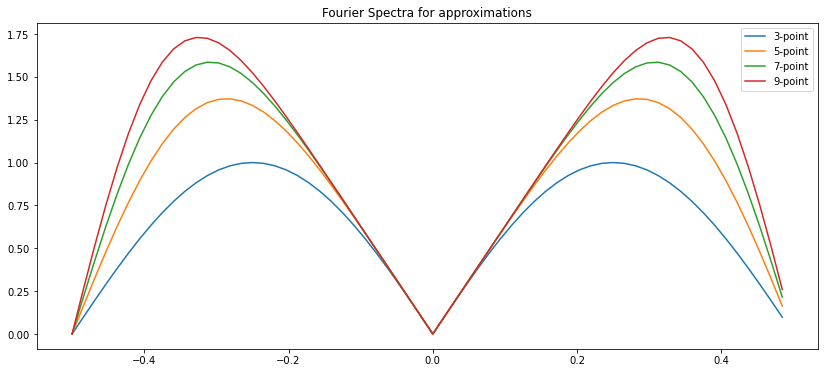

In [10]:
plt.figure(figsize=(14,6))

plt.plot(shift,abs(f3),label='3-point')
plt.plot(shift,abs(f5),label='5-point')
plt.plot(shift,abs(f7),label='7-point')
plt.plot(shift,abs(f9),label='9-point')

plt.title('Fourier Spectra for approximations')
plt.legend()

plt.show()

(d) To examine the accuracy of these four approximations, include a plot on the same graph of the expected **analytic spectral response** (i.e., $\left|\frac{\partial}{\partial t}\right| \Longleftrightarrow \left| 2\pi i f\right|=2\pi |f|$). Don't forget to include a legend!
     

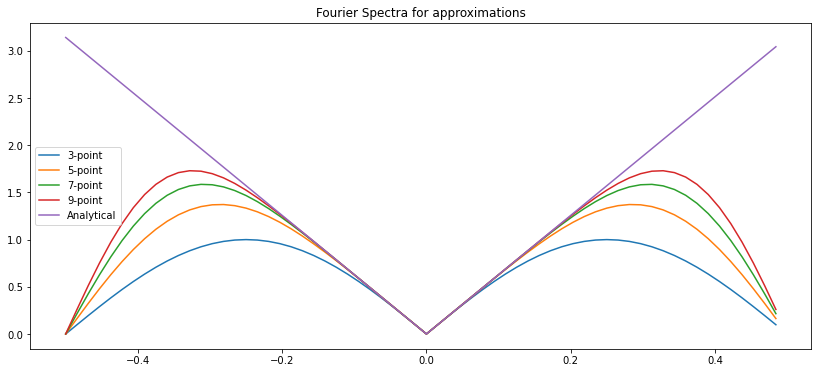

In [11]:
ddt = 2 * np.pi * np.abs(shift) 

plt.figure(figsize=(14,6))

plt.plot(shift,abs(f3),label='3-point')
plt.plot(shift,abs(f5),label='5-point')
plt.plot(shift,abs(f7),label='7-point')
plt.plot(shift,abs(f9),label='9-point')
plt.plot(shift,ddt,label='Analytical')

plt.title('Fourier Spectra for approximations')
plt.legend()

plt.show()

(e) Comment on how the overall accuracy of the FD approximation changes as a function of the order of accuracy.

**As you increase the accuracy you get a more accurate FD approximation. As we can see, as the number of points increases, the numerical estimation gets closer to the analytical solution as shown in the plot above.**

(f) If you had high-frequency components in your signal (i.e., relative to the Nyquist frequency), what order of FD accuracy would you chose and why?

**I would choose a higher order of FD accuracy. As demonstrated in the plot above, the higher order FD approximations correspond to higher frequencies in the fourier domain.**

## Q3: Evaluating 2nd Derivative FD Operator Accuracy

Let's now repeat the analysis for 2nd derivative FD approximations.  You may find the coefficients listed in the table located [here](https://en.wikipedia.org/wiki/Finite_difference_coefficient#Central_finite_difference).

(a) Produce a plot of the Fourier Spectra for the 2nd-, 4th-, 6th- and 8th-order 2nd-derivative approximations along with the expected **analytic spectral response** response (i.e., $\left|\frac{\partial^2}{\partial t^2}\right| \Longleftrightarrow \left| 4\pi^2 f^2\right|=4\pi^2 f^2$).  Don't forget to include a legend!

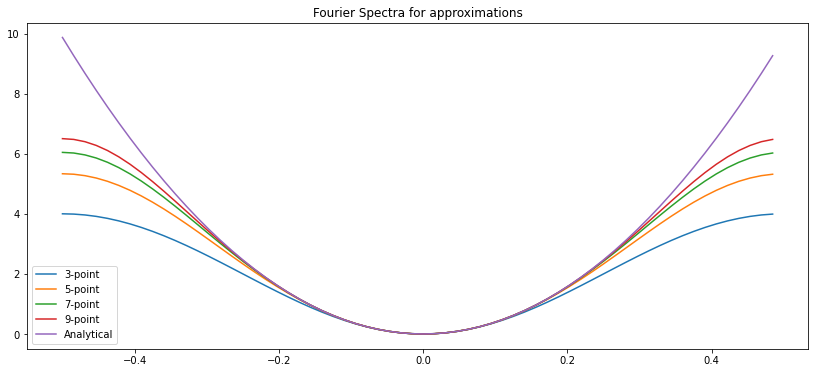

In [12]:
ck3 = np.concatenate((np.array([1,-2,1]),np.zeros(61)))
ck5 = np.concatenate((np.array([-1/12,4/3,-5/2,4/3,-1/12]),np.zeros(59)))
ck7 = np.concatenate((np.array([1/90,-3/20,3/2,-49/18,3/2,-3/20,1/90]),np.zeros(57)))
ck9 = np.concatenate((np.array([-1/560,8/315,-1/5,8/5,-205/72,8/5,-1/5,8/315,-1/560]),np.zeros(55)))

f3 = np.fft.fftshift(ck3@s64)
f5 = np.fft.fftshift(ck5@s64)
f7 = np.fft.fftshift(ck7@s64)
f9 = np.fft.fftshift(ck9@s64)

ddt2 = 4 * np.pi ** 2 * shift ** 2

plt.figure(figsize=(14,6))

plt.plot(shift,abs(f3),label='3-point')
plt.plot(shift,abs(f5),label='5-point')
plt.plot(shift,abs(f7),label='7-point')
plt.plot(shift,abs(f9),label='9-point')
plt.plot(shift,ddt2,label='Analytical')

plt.title('Fourier Spectra for approximations')
plt.legend()

plt.show()

(b) Comment on whether the 2nd-derivative approximations generally are more accurate than their 1st-derivative counterparts.

**The 2nd derivative approximations look more accurate than their 1st derivative counterparts.**